# แบบฝึกหัด multiple linear regression model

เอกสารจาก
- https://www.kaggle.com/datasets/bumba5341/advertisingcsv
- Advertising.csv 

- https://pyshark.com/visualization-of-multidimensional-datasets-using-t-sne-in-python/

![title](lab14.png)

# Yₑ = α + β₁X₁ + β₂X₂ + … + βnXn,

In [25]:
import pandas as pd
df = pd.read_csv('Advertising.csv')
df.sample(5)

Unnamed: 0     TV  Radio  Newspaper  Sales
169         170  284.3   10.6        6.4   15.0
19           20  147.3   23.9       19.1   14.6
185         186  205.0   45.1       19.6   22.6
104         105  238.2   34.3        5.3   20.7
3             4  151.5   41.3       58.5   18.5

# Sales = α + β₁*TV + β₂*Radio + β₂*Newspaper

In [5]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['TV', 'Radio', 'Newspaper']
X = df[predictors]
y = df['Sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [6]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2.938889369459412
betas = [ 0.04576465  0.18853002 -0.00103749]


#### Sales = 2.938889369459412 + 0.04576465*TV + 0.188530020*Radio + (-0.00103749*Newspaper)

In [17]:
XTest = [[120,30,15]]
model.predict(XTest)

array([14.07098494])

# Visualization of Multidimensional Datasets Using t-SNE in Python
- https://pyshark.com/visualization-of-multidimensional-datasets-using-t-sne-in-python/

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [29]:
feature = df.drop(columns='Sales',axis=1)
feature = feature.drop(columns='Unnamed: 0',axis=1)
feature.sample(5)

TV  Radio  Newspaper
140   73.4   17.0       12.9
64   131.1   42.8       28.9
98   289.7   42.3       51.2
100  222.4    4.3       49.8
111  241.7   38.0       23.2

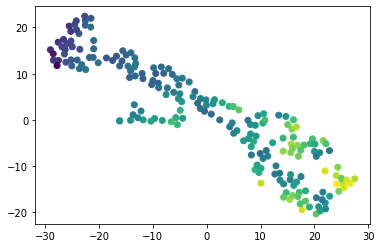

In [49]:
# ข้อมูลจาก 3 dimensions สู่ 2 dimensions

tsne = TSNE(n_components = 2,perplexity=20,random_state=0)
tsne_results = tsne.fit_transform(feature)

tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=df.Sales)
plt.show()